In [1]:
require 'cudnn'
require 'inn'
require 'image'
require 'dcnn'

-- Loads the mapping from net outputs to human readable labels
function load_synset()
  local file = io.open 'synset_words.txt'
  local list = {}
  while true do
    local line = file:read()
    if not line then break end
    table.insert(list, string.sub(line,11))
  end
  return list
end

-- Converts an image from RGB to BGR format and subtracts mean
function preprocess(im, img_mean)
  -- rescale the image
  local im3 = image.scale(im,224,224,'bilinear')*255
  -- RGB2BGR
  local im4 = im3:clone()
  im4[{1,{},{}}] = im3[{3,{},{}}]
  im4[{3,{},{}}] = im3[{1,{},{}}]

  -- subtract imagenet mean
  return im4 - image.scale(img_mean, 224, 224, 'bilinear')
end

-- Setting up networks 
print '==> Loading network'

--net = torch.load('/home/yusheng/Workspace/DeepLearning/models/zeilerNet/zeilerNet.net')
net = torch.load('/usr/local/data/zeilerNet/zeilerNet.net')
net:cuda()
-- as we want to classify, let's disable dropouts by enabling evaluation mode
net:evaluate()

print '==> Loading synsets'
synset_words = load_synset()

print '==> Loading image and imagenet mean'
image_name = 'Goldfish3.jpg'
--image_name = 'lena.jpg'
--image_name='people2.jpg'
img_mean_name = 'ilsvrc_2012_mean.t7'

im = image.load(image_name)
img_mean = torch.load(img_mean_name).img_mean:transpose(3,1)

-- Have to resize and convert from RGB to BGR and subtract mean
print '==> Preprocessing'
I = preprocess(im, img_mean)

-- Replace pooling by dual pooling
unpooling_layers = dcnn:ReplaceDualPoolingModule(net:get(1))

_,classes = net:forward(I:cuda()):view(-1):float():sort(true)

for i=1,5 do
  print('predicted class '..tostring(i)..': ', synset_words[classes[i] ])
end

==> Loading network	


==> Loading synsets	


==> Loading image and imagenet mean	


==> Preprocessing	


predicted class 1: 	goldfish, Carassius auratus	
predicted class 2: 	macaw	
predicted class 3: 	flamingo	
predicted class 4: 	axolotl, mud puppy, Ambystoma mexicanum	
predicted class 5: 	eft	


In [2]:
net

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> output]
  (1): nn.Sequential {
    [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> (13) -> (14) -> output]
    (1): cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)
    (2): cudnn.ReLU
    (3): inn.SpatialSameResponseNormalization
    (4): dcnn.DualSpatialMaxPooling(3,3,2,2)
    (5): cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)
    (6): cudnn.ReLU
    (7): inn.SpatialSameResponseNormalization
    (8): dcnn.DualSpatialMaxPooling(3,3,2,2)
    (9): cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)
    (10): cudnn.ReLU
    (11): cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)
    (12): cudnn.ReLU
    (13): cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)
    (14): cudnn.ReLU
  }
  (2): inn.SpatialPyramidPooling
  (3): nn.Sequential {
    [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> output]
    (1): nn.Linear(12800 -> 4096)
    (2): cudnn.ReLU
    (3): nn.Dropout(0.50000


                  output : CudaTensor - size: 96x110x110
                  gradInput : CudaTensor - size: 3x224x224
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41bc6b00
                  iSize : LongStorage - size: 4
                  convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x403fd078
                  output_offset : 1161600
                  gradBias : CudaTensor - size: 96
                  algType : cdata<enum 761 [?]>: 0x40403870
                  extraBuffer : CudaTensor - size: 147
                  extraBufferSizeInBytes : 588
                  oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x40dfbf18
                  oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x407ea830
                  groups : 1
                  dH : 2
                  dW : 2
                  nOutputPlane : 96
                  bias : CudaTensor - size: 96
                  kH : 7
                  weight_offset : 14112
                  finput : CudaTensor 

             biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x41a8fdd8
                  input_offset : 150528
                  weight : CudaTensor - size: 96x3x7x7
                  train : false
                  gradWeight : CudaTensor - size: 96x3x7x7
                  fgradInput : CudaTensor - empty
                  kW : 7
                  padH : 1
                  weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x407d3628
                }
              2 : 
                cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 96x110x110
                  gradInput : CudaTensor - empty
                  nElem : 1161600
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x417b2fc0
                }
         

     3 : 
                inn.SpatialSameResponseNormalization
                {
                  alpha : 5e-05
                  train : false
                  output : CudaTensor - size: 96x110x110
                  gradInput : CudaTensor - empty
                  size : 3
                  beta : 0.75
                  modules : nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.ConcatTable {
    input
      |`-> (1): nn.Identity
      |`-> (2): nn.Sequential {
      |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> output]
      |      (1): nn.SpatialZeroPadding(l=1,r=1,t=1,b=1)
      |      (2): nn.Power
      |      (3): nn.SpatialAveragePooling(3,3,1,1)
      |      (4): nn.MulConstant
      |      (5): nn.AddConstant
      |      (6): nn.Power
      |    }
       ... -> output
  }
  (2): nn.CDivTable
}
                }
              4 : 
                dcnn.DualSpatialMaxPooling(3,3,2,2)
                {
                  dH : 2
                  dW : 2
 

      output : CudaTensor - size: 96x55x55
                  padW : 0
                  kW : 3
                }
              5 : 
                cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)
                {
                  padW : 0
                  nInputPlane : 96
                  output : CudaTensor - size: 256x26x26
                  gradInput : CudaTensor - size: 96x55x55
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x406ccd18
                  iSize : LongStorage - size: 4
                  convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x406c4c40
                  output_offset : 173056
                  gradBias : CudaTensor - size: 256
                  algType : cdata<enum 761 [?]>: 0x4071c1f0
                  extraBuffer : CudaTensor - size: 2400
                  extraBufferSizeInBytes : 9600
                  oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x40720b18
                  oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x4

   bias : CudaTensor - size: 256
                  kH : 5
                  weight_offset : 614400
                  finput : CudaTensor - empty
                  biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x407e4660
                  input_offset : 290400
                  weight : CudaTensor - size: 256x96x5x5
                  train : false
                  gradWeight : CudaTensor - size: 256x96x5x5
                  fgradInput : CudaTensor - empty
                  kW : 5
                  padH : 0
                  weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x407e57d0
                }
              6 : 
                cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 256x26x26
               

   gradInput : CudaTensor - empty
                  nElem : 173056
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40a9cc50
                }
              7 : 
                inn.SpatialSameResponseNormalization
                {
                  alpha : 5e-05
                  train : false
                  output : CudaTensor - size: 256x26x26
                  gradInput : CudaTensor - empty
                  size : 3
                  beta : 0.75
                  modules : nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.ConcatTable {
    input
      |`-> (1): nn.Identity
      |`-> (2): nn.Sequential {
      |      [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> output]
      |      (1): nn.SpatialZeroPadding(l=1,r=1,t=1,b=1)
      |      (2): nn.Power
      |      (3): nn.SpatialAveragePooling(3,3,1,1)
      |      (4): nn.MulConstant
      |      (5): nn.AddConstant
      |      (6): nn.Power
      |    }
       ... -> output
  }
  (2): nn.CD

                  padH : 0
                  gradInput : CudaTensor - empty
                  indices : CudaTensor - size: 256x13x13
                  dualModule : dcnn.DualSpatialMaxUnpooling
                  kH : 3
                  output : CudaTensor - size: 256x13x13
                  padW : 0
                  kW : 3
                }
              9 : 
                cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)
                {
                  padW : 1
                  nInputPlane : 256
                  output : CudaTensor - size: 384x13x13
                  gradInput : CudaTensor - size: 256x13x13
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40d95c10
                  iSize : LongStorage - size: 4
                  convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x40a99fc0
                  output_offset : 64896
                  gradBias : CudaTensor - size: 384
         

         algType : cdata<enum 761 [?]>: 0x404d9e38
                  extraBuffer : CudaTensor - size: 2304
                  extraBufferSizeInBytes : 9216
                  oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x408eb810
                  oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x4126cc00
                  groups : 1
                  dH : 1
                  dW : 1
                  nOutputPlane : 384
                  bias : CudaTensor - size: 384
                  kH : 3
                  weight_offset : 884736
                  finput : CudaTensor - empty
                  biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40d93110
                  input_offset : 43264
                  weight : CudaTensor - size: 384x256x3x3
                  train : false
                  gradWeight : CudaTensor - size: 384x256x3x3
                  fgradInput : CudaTensor - empty
                  kW : 3
                  padH : 1
     

             weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x4068c538
                }
              10 : 
                cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 384x13x13
                  gradInput : CudaTensor - empty
                  nElem : 64896
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40677968
                }
              11 : 
                cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)
                {
                  padW : 1
                  nInputPlane : 384
                  output : CudaTensor - size: 384x13x13
                  gradInput : CudaTensor - size: 384x13x13
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40d8bd40
                  iSize : LongStorage - size: 4
  

                convDesc : cdata<struct cudnnConvolutionStruct *[1]>: 0x408d6870
                  output_offset : 64896
                  gradBias : CudaTensor - size: 384
                  algType : cdata<enum 761 [?]>: 0x40527558
                  extraBuffer : CudaTensor - size: 3456
                  extraBufferSizeInBytes : 13824
                  oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x40df5020
                  oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x408e4d50
                  groups : 1
                  dH : 1
                  dW : 1
                  nOutputPlane : 384
                  bias : CudaTensor - size: 384
                  kH : 3
                  weight_offset : 1327104
                  finput : CudaTensor - empty
                  biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x411affd0
                  input_offset : 64896
                  weight : CudaTensor - size: 384x384x3x3
                  train : false
                  gra

  fgradInput : CudaTensor - empty
                  kW : 3
                  padH : 1
                  weightDesc : cdata<struct cudnnFilterStruct *[1]>: 0x408e55b0
                }
              12 : 
                cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 384x13x13
                  gradInput : CudaTensor - empty
                  nElem : 64896
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x404e66c8
                }
              13 : 
                cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)
                {
                  padW : 1
                  nInputPlane : 384
                  output : CudaTensor - size: 256x13x13
                  gradInput : CudaTensor - size: 384x13x13
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40682278
                  iSize : LongStorage - size: 4
  

                  output_offset : 43264
                  gradBias : CudaTensor - size: 256
                  algType : cdata<enum 761 [?]>: 0x408d0ba8
                  extraBuffer : CudaTensor - size: 3456
                  extraBufferSizeInBytes : 13824
                  oDescForBias : cdata<struct cudnnTensorStruct *[1]>: 0x40d91438
                  oDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40d8c2f8
                  groups : 1
                  dH : 1
                  dW : 1
                  nOutputPlane : 256
                  bias : CudaTensor - size: 256
                  kH : 3
                  weight_offset : 884736
                  finput : CudaTensor - empty
                  biasDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40aa15c0
                  input_offset : 64896
                  weight : CudaTensor - size: 256x384x3x3
                  train : false
                  gradWeight : CudaTensor - size: 256x384x3x3
                  fgradInput : CudaTensor

          }
              14 : 
                cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 256x13x13
                  gradInput : CudaTensor - empty
                  nElem : 43264
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x404ec620
                }
            }
          train : false
          output : CudaTensor - size: 256x13x13
        }
      2 : 
        inn.SpatialPyramidPooling
        {
          pyr : 
            {
              1 : 
                {
                  1 : 1
                  2 : 1
                }
              2 : 
              

  {
                  1 : 2
                  2 : 2
                }
              3 : 
                {
                  1 : 3
                  2 : 3
                }
              4 : 
                {
                  1 : 6
                  2 : 6
                }
            }
          train : false
          output : CudaTensor - size: 12800
          gradInput : CudaTensor - empty
          module : 
            nn.Concat {
              input
                |`-> (1): nn.Sequential {
                |      [input -> (1) -> (2) -> output]
                |      (1): nn.SpatialAdaptiveMaxPooling
                |      (2): nn.View
                |    }
                |`-> (2): nn.Sequential {
                |      [input -> (1) -> (2) -> output]
                |      (1): nn.SpatialAdaptiveMaxPooling
                |      (2): nn.View
                |    }
                |`-> (3): nn.Sequential {
                |      [input -> (1) -> (2) -> output]
              

     {
                  1 : nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.SpatialAdaptiveMaxPooling
  (2): nn.View
}
                  2 : nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.SpatialAdaptiveMaxPooling
  (2): nn.View
}
                  3 : nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.SpatialAdaptiveMaxPooling
  (2): nn.View
}
                  4 : nn.Sequential {
  [input -> (1) -> (2) -> output]
  (1): nn.SpatialAdaptiveMaxPooling
  (2): nn.View
}
                }
              size : LongStorage - size: 1
              dimension : 1
            }
          dimd : 1
        }
      3 : 
        nn.Sequential {
          [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> output]
          (1): nn.Linear(12800 -> 4096)
          (2): cudnn.ReLU
          (3): nn.Dropout(0.500000)
          (4): nn.Linear(4096 -> 4096)
          (5): cudnn.ReLU
          (6): nn.Dropout(0.500000)
          (7): nn.Linear(4096 -> 1000)
       

        gradWeight : CudaTensor - size: 4096x12800
                }
              2 : 
                cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 4096
                  gradInput : CudaTensor - empty
                  nElem : 4096
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x40930490
                }
              3 : 
                nn.Dropout(0.500000)
                {
                  v2 : false
                  noise : CudaTensor - empty
                  train : false
                  p : 0.5
                  gradInput : CudaTensor - empty
                  output : CudaTensor - size: 4096
                }
              4 : 
  

              nn.Linear(4096 -> 4096)
                {
                  gradBias : CudaTensor - size: 4096
                  weight : CudaTensor - size: 4096x4096
                  train : false
                  bias : CudaTensor - size: 4096
                  gradInput : CudaTensor - empty
                  output : CudaTensor - size: 4096
                  gradWeight : CudaTensor - size: 4096x4096
                }
              5 : 
                cudnn.ReLU
                {
                  inplace : true
                  mode : CUDNN_ACTIVATION_RELU
                  train : false
                  output : CudaTensor - size: 4096
                  gradInput : CudaTensor - empty
                  nElem : 4096
                  iDesc : cdata<struct cudnnTensorStruct *[1]>: 0x407e2700
                }
              6 : 
                nn.Dropout(0.500000)
               

 {
                  v2 : false
                  noise : CudaTensor - empty
                  train : false
                  p : 0.5
                  gradInput : CudaTensor - empty
                  output : CudaTensor - size: 4096
                }
              7 : 
                nn.Linear(4096 -> 1000)
                {
                  gradBias : CudaTensor - size: 1000
                  weight : CudaTensor - size: 1000x4096
                  train : false
                  bias : CudaTensor - size: 1000
                  gradInput : CudaTensor - empty
                  output : CudaTensor - size: 1000
                  gradWeight : CudaTensor - size: 1000x4096
                }
            }
          train : false
          output : CudaTensor - size: 1000
        }
    }
  train : false
  

output : CudaTensor - size: 1000
}


#Guided ReLU

cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)	
deconv layer has been built !	


cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)	
deconv layer has been built !	


==> Time elapsed: 0.15059399604797 seconds	


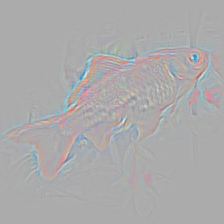

In [2]:
require'testing_deconvLayer'

-- set deconvNet
deconvNet = nn.Sequential()

deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(13), net:get(1):get(11).output:size(2), 153 ))
deconvNet:add(dcnn.GuidedReLU( net:get(1):get(11)))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(11), net:get(1):get(9).output:size(2), true ))
deconvNet:add(dcnn.GuidedReLU( net:get(1):get(9)))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(9), net:get(1):get(8).output:size(2), true ))
deconvNet:add(unpooling_layers[2])
deconvNet:add(dcnn.GuidedReLU( net:get(1):get(5)))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(5), net:get(1):get(4).output:size(2), true ))
deconvNet:add(unpooling_layers[1])
deconvNet:add(dcnn.GuidedReLU( net:get(1):get(1)))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(1), I:size(2), true ))


deconv_timer = torch.Timer()
vis_c5 = deconvNet:forward(net:get(1):get(13).output)


--vis_c2 = deconvNet:forward(net:get(1):get(5).output )
--print(net:get(1):get(1).output:size())


print('==> Time elapsed: ' .. deconv_timer:time().real .. ' seconds')


--print(net:get(1):get(1).output:size())
--print(net:get(1):get(2).output:size())
--print(net:get(1):get(3).output:size())
--print(net:get(1):get(4).output:size())

--print(vis_c2:size())

itorch.image(vis_c5)
--itorch.image(vis_c2)

cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)	
deconv layer has been built !	


cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)	
deconv layer has been built !	


==> Time elapsed: 0.18878889083862 seconds	


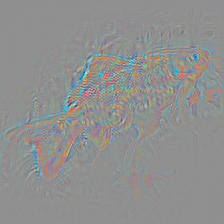

In [3]:
-- set deconvNet
deconvNet = nn.Sequential()

deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(13), net:get(1):get(11).output:size(2), 153 ))
deconvNet:add(cudnn.ReLU(true))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(11), net:get(1):get(9).output:size(2), true ))
deconvNet:add(cudnn.ReLU(true))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(9), net:get(1):get(8).output:size(2), true ))
deconvNet:add(unpooling_layers[2])
deconvNet:add(cudnn.ReLU(true))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(5), net:get(1):get(4).output:size(2), true ))
deconvNet:add(unpooling_layers[1])
deconvNet:add(cudnn.ReLU(true))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(1), I:size(2), true ))


deconv_timer = torch.Timer()
vis_c5 = deconvNet:forward(net:get(1):get(13).output)


--vis_c2 = deconvNet:forward(net:get(1):get(5).output )
--print(net:get(1):get(1).output:size())


print('==> Time elapsed: ' .. deconv_timer:time().real .. ' seconds')


--print(net:get(1):get(1).output:size())
--print(net:get(1):get(2).output:size())
--print(net:get(1):get(3).output:size())
--print(net:get(1):get(4).output:size())

--print(vis_c2:size())

itorch.image(vis_c5)
--itorch.image(vis_c2)

cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)	
deconv layer has been built !	


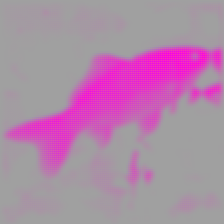

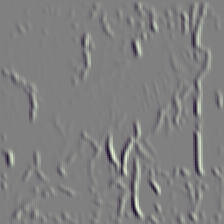

In [4]:
conv1_fm = net:get(1):get(1).output
deconv1 = Test_SpatialDeconvolution( net:get(1):get(1), I:size(2), 47 )
vis_1 = deconv1:forward(conv1_fm)

deconv1 = Test_SpatialDeconvolution( net:get(1):get(1), I:size(2), 94 )
vis_2 = deconv1:forward(conv1_fm)

itorch.image(vis_1)
itorch.image(vis_2)

cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)	
deconv layer has been built !	


==> Time elapsed: 0.18107795715332 seconds	


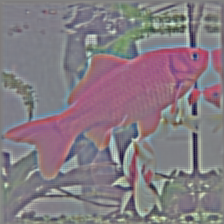

In [5]:
conv1_fm = net:get(1):get(1).output
deconv_idx = torch.IntTensor(96)
--deconv_idx[1] = 47
--deconv_idx[2] = 94

for i=1,96 do
   deconv_idx[i]=i 
end
    
deconv1 = Test_SpatialDeconvolution( net:get(1):get(1), I:size(2), deconv_idx  )
deconv_timer = torch.Timer()
vis_n = deconv1:forward(conv1_fm)
print('==> Time elapsed: ' .. deconv_timer:time().real .. ' seconds')
itorch.image(vis_n)


 256
  26
  26
[torch.LongStorage of size 3]



cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)	
deconv layer has been built !	


cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)	
deconv layer has been built !	



  1
 96
 55
 55
[torch.LongStorage of size 4]



==> Time elapsed: 0.53701901435852 seconds	


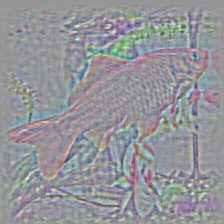

In [8]:
conv2_fm = net:get(1):get(5).output
print(conv2_fm:size() )

deconv_idx = torch.IntTensor(256)
for i=1,256 do
   deconv_idx[i]=i 
end

deconv2 = nn.Sequential()
deconv2:add(Test_SpatialDeconvolution( net:get(1):get(5), net:get(1):get(4).output:size(2), deconv_idx ))
deconv2:add(unpooling_layers[1])
deconv2:add(cudnn.ReLU(true))
deconv2:add(Test_SpatialDeconvolution( net:get(1):get(1), I:size(2), true ))


deconv_timer = torch.Timer()
vis_c2 = deconv2:forward(conv2_fm)
print('==> Time elapsed: ' .. deconv_timer:time().real .. ' seconds')
itorch.image(vis_c2)

#Guided ReLU (deconv2)


 256
  26
  26
[torch.LongStorage of size 3]



cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)	
deconv layer has been built !	


cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)	
deconv layer has been built !	


==> Time elapsed: 0.40730500221252 seconds	


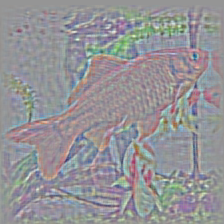

In [6]:
conv2_fm = net:get(1):get(5).output
print(conv2_fm:size() )

deconv_idx = torch.IntTensor(256)
for i=1,256 do
   deconv_idx[i]=i 
end

deconv2 = nn.Sequential()
deconv2:add(Test_SpatialDeconvolution( net:get(1):get(5), net:get(1):get(4).output:size(2), deconv_idx ))
deconv2:add(unpooling_layers[1])
deconv2:add(dcnn.GuidedReLU(net:get(1):get(1)))
deconv2:add(Test_SpatialDeconvolution( net:get(1):get(1), I:size(2), true ))


deconv_timer = torch.Timer()
vis_c2 = deconv2:forward(conv2_fm)
print('==> Time elapsed: ' .. deconv_timer:time().real .. ' seconds')
itorch.image(vis_c2)


 384
  13
  13
[torch.LongStorage of size 3]



cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)	
deconv layer has been built !	


cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)	
deconv layer has been built !	



   1
 256
  13
  13
[torch.LongStorage of size 4]



==> Time elapsed: 0.45119094848633 seconds	


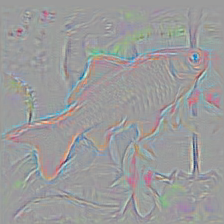

In [11]:
conv3_fm = net:get(1):get(9).output
print(conv3_fm:size() )

deconv_idx = torch.IntTensor(384)
for i=1,384 do
   deconv_idx[i]=i 
end

deconv3 = nn.Sequential()

deconv3:add(Test_SpatialDeconvolution( net:get(1):get(9), net:get(1):get(8).output:size(2), deconv_idx ))
deconv3:add(unpooling_layers[2])
deconv3:add(cudnn.ReLU(true))
deconv3:add(Test_SpatialDeconvolution( net:get(1):get(5), net:get(1):get(4).output:size(2), true ))
deconv3:add(unpooling_layers[1])
deconv3:add(cudnn.ReLU(true))
deconv3:add(Test_SpatialDeconvolution( net:get(1):get(1), I:size(2), true ))
deconv_timer = torch.Timer()
vis_c3 = deconv3:forward(conv3_fm)
print('==> Time elapsed: ' .. deconv_timer:time().real .. ' seconds')
itorch.image(vis_c3)

#Guided ReLU ( deconv3 )


 384
  13
  13
[torch.LongStorage of size 3]



cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)	
deconv layer has been built !	


cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)	
deconv layer has been built !	


==> Time elapsed: 0.38920593261719 seconds	


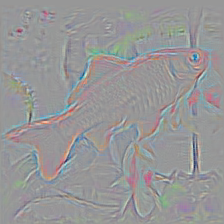

In [7]:
conv3_fm = net:get(1):get(9).output
print(conv3_fm:size() )

deconv_idx = torch.IntTensor(384)
for i=1,384 do
   deconv_idx[i]=i 
end

deconv3 = nn.Sequential()

deconv3:add(Test_SpatialDeconvolution( net:get(1):get(9), net:get(1):get(8).output:size(2), deconv_idx ))
deconv3:add(unpooling_layers[2])
deconv3:add(dcnn.GuidedReLU(net:get(1):get(5)))
deconv3:add(Test_SpatialDeconvolution( net:get(1):get(5), net:get(1):get(4).output:size(2), true ))
deconv3:add(unpooling_layers[1])
deconv3:add(dcnn.GuidedReLU(net:get(1):get(1)))
deconv3:add(Test_SpatialDeconvolution( net:get(1):get(1), I:size(2), true ))
deconv_timer = torch.Timer()
vis_c3 = deconv3:forward(conv3_fm)
print('==> Time elapsed: ' .. deconv_timer:time().real .. ' seconds')
itorch.image(vis_c3)


 384
  13
  13
[torch.LongStorage of size 3]



cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)	
deconv layer has been built !	


cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)	
deconv layer has been built !	



   1
 384
  13
  13
[torch.LongStorage of size 4]



==> Time elapsed: 0.38495302200317 seconds	


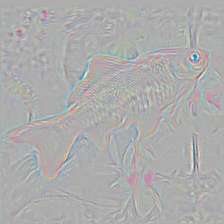

In [12]:
conv4_fm = net:get(1):get(11).output
print(conv4_fm:size() )

deconv_idx = torch.IntTensor(384)
for i=1,384 do
   deconv_idx[i]=i 
end


deconv4 = nn.Sequential()

deconv4:add(Test_SpatialDeconvolution( net:get(1):get(11), net:get(1):get(9).output:size(2), deconv_idx ))
deconv4:add(cudnn.ReLU(true))
deconv4:add(Test_SpatialDeconvolution( net:get(1):get(9), net:get(1):get(8).output:size(2), true ))
deconv4:add(unpooling_layers[2])
deconv4:add(cudnn.ReLU(true))
deconv4:add(Test_SpatialDeconvolution( net:get(1):get(5), net:get(1):get(4).output:size(2), true ))
deconv4:add(unpooling_layers[1])
deconv4:add(cudnn.ReLU(true))
deconv4:add(Test_SpatialDeconvolution( net:get(1):get(1), I:size(2), true ))
deconv_timer = torch.Timer()
vis_c4 = deconv4:forward(conv4_fm)
print('==> Time elapsed: ' .. deconv_timer:time().real .. ' seconds')
itorch.image(vis_c4)

#Guided ReLU ( deconv4 )


 384
  13
  13
[torch.LongStorage of size 3]



cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)	
deconv layer has been built !	


cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)	
deconv layer has been built !	


==> Time elapsed: 0.31964206695557 seconds	


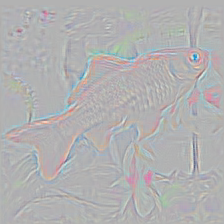

In [8]:
conv4_fm = net:get(1):get(11).output
print(conv4_fm:size() )

deconv_idx = torch.IntTensor(384)
for i=1,384 do
   deconv_idx[i]=i 
end


deconv4 = nn.Sequential()

deconv4:add(Test_SpatialDeconvolution( net:get(1):get(11), net:get(1):get(9).output:size(2), deconv_idx ))
deconv4:add(dcnn.GuidedReLU(net:get(1):get(9)))
deconv4:add(Test_SpatialDeconvolution( net:get(1):get(9), net:get(1):get(8).output:size(2), true ))
deconv4:add(unpooling_layers[2])
deconv4:add(dcnn.GuidedReLU(net:get(1):get(5)))
deconv4:add(Test_SpatialDeconvolution( net:get(1):get(5), net:get(1):get(4).output:size(2), true ))
deconv4:add(unpooling_layers[1])
deconv4:add(dcnn.GuidedReLU(net:get(1):get(1)))
deconv4:add(Test_SpatialDeconvolution( net:get(1):get(1), I:size(2), true ))
deconv_timer = torch.Timer()
vis_c4 = deconv4:forward(conv4_fm)
print('==> Time elapsed: ' .. deconv_timer:time().real .. ' seconds')
itorch.image(vis_c4)


 256
  13
  13
[torch.LongStorage of size 3]



cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)	
deconv layer has been built !	


cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)	
deconv layer has been built !	


==> Time elapsed: 0.33872604370117 seconds	


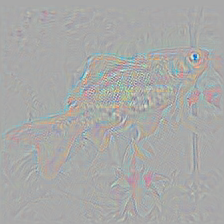

In [9]:
conv5_fm = net:get(1):get(13).output
print(conv5_fm:size() )

deconv_idx = torch.IntTensor(256)
for i=1,256 do
   deconv_idx[i]=i 
end




deconvNet = nn.Sequential()

deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(13), net:get(1):get(11).output:size(2), deconv_idx ))
deconvNet:add(cudnn.ReLU(true))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(11), net:get(1):get(9).output:size(2), true ))
deconvNet:add(cudnn.ReLU(true))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(9), net:get(1):get(8).output:size(2), true ))
deconvNet:add(unpooling_layers[2])
deconvNet:add(cudnn.ReLU(true))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(5), net:get(1):get(4).output:size(2), true ))
deconvNet:add(unpooling_layers[1])
deconvNet:add(cudnn.ReLU(true))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(1), I:size(2), true ))




deconv_timer = torch.Timer()
vis_c5 = deconvNet:forward(conv5_fm)

print('==> Time elapsed: ' .. deconv_timer:time().real .. ' seconds')
itorch.image(vis_c5)

#Guided ReLU ( deconv5 )


 256
  13
  13
[torch.LongStorage of size 3]



cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)	
deconv layer has been built !	


cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)	
deconv layer has been built !	


==> Time elapsed: 0.33654499053955 seconds	


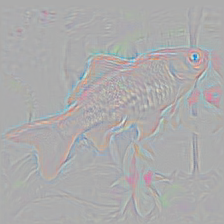

In [11]:
conv5_fm = net:get(1):get(13).output
print(conv5_fm:size() )

deconv_idx = torch.IntTensor(256)
for i=1,256 do
   deconv_idx[i]=i 
end




deconvNet = nn.Sequential()

deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(13), net:get(1):get(11).output:size(2), deconv_idx ))
deconvNet:add(dcnn.GuidedReLU(net:get(1):get(11)))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(11), net:get(1):get(9).output:size(2), true ))
deconvNet:add(dcnn.GuidedReLU(net:get(1):get(9)))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(9), net:get(1):get(8).output:size(2), true ))
deconvNet:add(unpooling_layers[2])
deconvNet:add(dcnn.GuidedReLU(net:get(1):get(5)))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(5), net:get(1):get(4).output:size(2), true ))
deconvNet:add(unpooling_layers[1])
deconvNet:add(dcnn.GuidedReLU(net:get(1):get(1)))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(1), I:size(2), true ))




deconv_timer = torch.Timer()
vis_c5 = deconvNet:forward(conv5_fm)

print('==> Time elapsed: ' .. deconv_timer:time().real .. ' seconds')
itorch.image(vis_c5)

cudnn.SpatialConvolution(384 -> 256, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(384 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(256 -> 384, 3x3, 1,1, 1,1)	
deconv layer has been built !	


cudnn.SpatialConvolution(96 -> 256, 5x5, 2,2)	
deconv layer has been built !	


cudnn.SpatialConvolution(3 -> 96, 7x7, 2,2, 1,1)	
deconv layer has been built !	


==> Time elapsed: 0.21016407012939 seconds	


0	


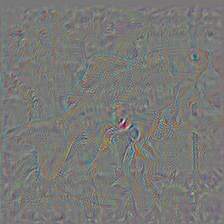

==> Time elapsed: 0.12574315071106 seconds	


0	


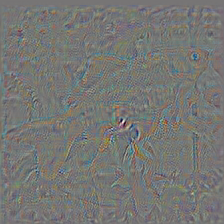

==> Time elapsed: 0.1291880607605 seconds	


0	


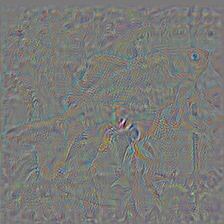

==> Time elapsed: 0.12297010421753 seconds	


0	


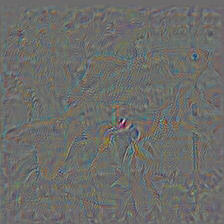

==> Time elapsed: 0.11956810951233 seconds	


0	


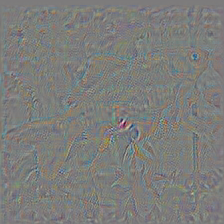

==> Time elapsed: 0.12120795249939 seconds	


0	


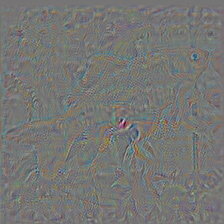

==> Time elapsed: 0.12375402450562 seconds	


0	


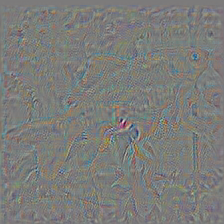

==> Time elapsed: 0.12614512443542 seconds	


0	


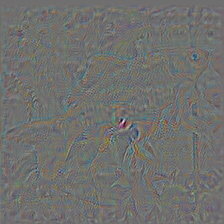

==> Time elapsed: 0.12719917297363 seconds	


0	


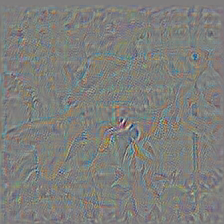

==> Time elapsed: 0.1303288936615 seconds	


0	


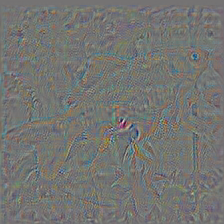

==> Time elapsed: 0.15926194190979 seconds	


0	


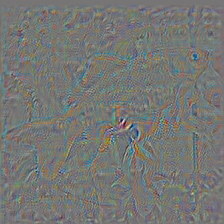

==> Time elapsed: 0.12608408927917 seconds	


0	


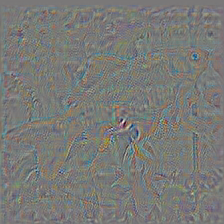

==> Time elapsed: 0.13297080993652 seconds	


0	


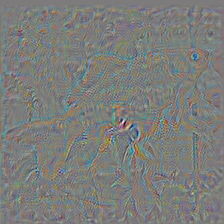

==> Time elapsed: 0.12974905967712 seconds	


0	


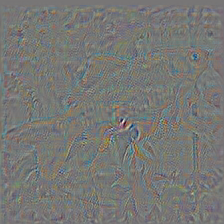

==> Time elapsed: 0.12302899360657 seconds	


0	


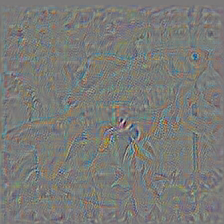

==> Time elapsed: 0.12773203849792 seconds	


0	


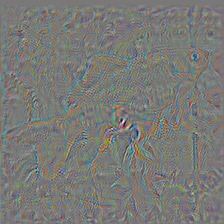

==> Time elapsed: 0.1211040019989 seconds	


0	


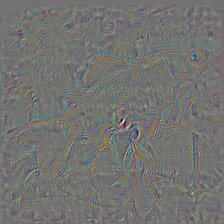

==> Time elapsed: 0.11696314811707 seconds	


0	


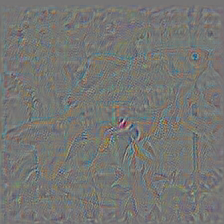

==> Time elapsed: 0.11909008026123 seconds	


0	


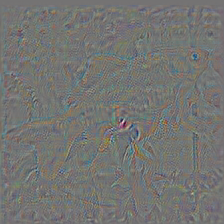

==> Time elapsed: 0.12001609802246 seconds	


0	


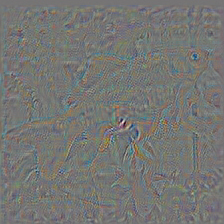

In [7]:
deconvNet = nn.Sequential()

deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(13), net:get(1):get(11).output:size(2), 27 ))
deconvNet:add(cudnn.ReLU(true))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(11), net:get(1):get(9).output:size(2), true ))
deconvNet:add(cudnn.ReLU(true))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(9), net:get(1):get(8).output:size(2), true ))
deconvNet:add(unpooling_layers[2])
deconvNet:add(cudnn.ReLU(true))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(5), net:get(1):get(4).output:size(2), true ))
deconvNet:add(unpooling_layers[1])
deconvNet:add(cudnn.ReLU(true))
deconvNet:add(Test_SpatialDeconvolution( net:get(1):get(1), I:size(2), true ))


layer_n = 1
deconv_timer = torch.Timer()

for i=1,20 do
    deconv_timer = torch.Timer()
    vis_c5 = deconvNet:forward(net:get(1):get(13).output)

    print('==> Time elapsed: ' .. deconv_timer:time().real .. ' seconds')  
    --print( deconvNet_test2:get(layer_n).output:size() )
    
    if i==1 then
        last_output = deconvNet:get(layer_n).output
        --last_output = net:get(1):get(13).output
    end
    
    error_tensor = last_output - deconvNet:get(layer_n).output
    --error_tensor = last_output-net:get(1):get(13).output
    local test_error = 0
    for j=1, error_tensor:view(-1):size(1) do
        test_error = test_error + error_tensor:view(-1)[j]
    end
        
    print(test_error)

    --itorch.image( deconvNet:get(1).output )
    itorch.image(vis_c5 )
    last_time = deconv_timer:time().real
end

